# BTTH04: Logistic Regression

Trần Tuấn Tú - 1312681

---



## 1. Cách làm bài và nộp bài

**Làm bài**

Bạn sẽ làm trực tiếp trên file notebook này; trong file, mình đã để từ `TODO` để cho biết những chỗ mà bạn cần phải làm (trong đó, `TODO` đầu tiên là bạn phải ghi họ tên và MSSV vào phần đầu của file). Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.

*Lưu ý: tuyệt đối không gian lận. Nếu vi phạm thì bạn sẽ bị 0 điểm cho cả phần thực hành môn học. Nên nhớ mục tiêu chính ở đây là học kiến thức.*

**Nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Cell` - `Run All` để chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Cell` - `Run All` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, trong thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`) bạn đặt file `Ex04-LogisticRegression.ipynb`; rồi nén thư mục `MSSV` này lại và nộp ở link trên moodle.

## 2. Import

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# You can also import other things ...

## 3. Hàm phát sinh dữ liệu

Trong bài tập này, bạn sẽ thử nghiệm Logistic Regression trên bộ dữ liệu tự tạo với không gian đầu vào $\mathcal{X}=[-1,1]\times[-1,1]$ (để có thể trực quan hóa được). Cách tạo bộ dữ liệu như sau:

- Đường phân lớp đích của mình trong không gian $\mathcal{X}$ là: $x_1 - x_2 = 0$. Đường phân lớp này sẽ chia không gian $\mathcal{X}$ làm hai vùng: vùng dương ứng với lớp $+1$ ($x_1 - x_2 > 0$) và vùng âm ứng với lớp $-1$ ($x_1 - x_2 < 0$).
- Mỗi input $x$ được phát sinh bằng cách lấy ngẫu nhiên một điểm trong không gian $\mathcal{X}=[-1,1]\times[-1,1]$ theo phân bố đều. Output $y$ tương ứng sẽ có giá trị là $-1$ nếu $x$ nằm ở vùng âm của đường phân lớp đích $x_1 - x_2 = 0$, và $+1$ nếu ngược lại; sau đó, phát sinh nhiễu bằng cách đổi dấu của output $y$ với xác xuất 0.1.

In [2]:
def sign(x):
    """
    Get sign of x. You can use this function in functions belows.
    
    Parameters
    ----------
    x : numpy array
    
    Returns
    -------
    s : numpy array, shape = shape of x
        Signs of elements of x. If a element of x < 0, its sign is -1; otherwise, its sign is 1.
    """
    s = np.ones(x.shape)
    s[x < 0] = -1
    return s

def generate_data(N):
    """
    Generates a data set.
    
    Parameters
    ----------
    N : int
        The number of examples.
    
    Returns
    -------
    (X, Y) : tuple
        X : numpy array, shape (N, 3)
            The matrix of input vectors (each row corresponds to an input vector); the first column of 
            this matrix is all ones (corresponding to x_0 = 1).
        Y : numpy array, shape (N, 1)
            The vector of outputs.        
    """
    # TODO
    X = np.ones((N, 3))
    i = 0
    for i in range(N):
        X[i, 1] = np.random.uniform(-1,1)
        X[i, 2] = np.random.uniform(-1,1)
    Y = np.zeros((N, 1))
    
    for i in range(N):
        if (sign(X[i][2] - X[i][1]) == -1):
            Y[i] = -1
        else:
            if (sign(X[i][2] - X[i][1]) == 1):
                Y[i] = 1
    
    for i in range(N):
        if (np.random.randint(1,11) == 1):
            Y[i] = -Y[i]
            i = i + 1
    
    return (X,Y)

## 4. Hàm huấn luyện Logistic Regression

In [3]:
def train_logistic_regression(X, Y, learning_rate, max_epoch):
    """
    Trains Logistic Regression on the dataset (X, Y).
    Cost function: mean negative log likelihood (it's the one I talked in the class).
    Optimization algorithm: Gradient Descent.
    
    Parameters
    ----------
    X : numpy array, shape (N, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones (corresponding to x_0).
    Y : numpy array, shape (N, 1)
        The vector of outputs.
    learning_rate : float
        The learning rate of Gradient Descent.
    max_epoch : int
        After this number of epochs (iterations), we'll terminate Gradient Descent.
    
    Returns
    -------
    (W, costs): tuple
        W : numpy array, shape (d + 1, 1)
            The vector of parameters of Logistic Regression after training.
        costs: list, len = max_epoch
            The list of cost values after each epoch.          
    """
    # TODO
    W = np.ones((X.shape[1], 1))
    #Random mang phi
    for i in range(X.shape[1]):
        #if (i > 0):
        W[i][0] = np.random.uniform(-2, 2)
    costs = np.zeros(max_epoch)
    costVal = 0
    for i in range(max_epoch): #Cho hoi quy epoch lan  
        #Tinh hypothesis
        J = (-Y * X) / (1 + 1 / np.exp(-Y * np.dot(X , W)))
        costVal = np.log(np.exp(-Y * np.dot(X , W)) + 1)
        
        sumJ = np.sum(J, axis = 0)
        sumCost = np.sum(costVal, axis = 0)
        
        sumJ = sumJ / X.shape[0]
        sumCost = sumCost / X.shape[0]
        
        sumJ = np.reshape(sumJ, (X.shape[1], 1))
        costs[i] = sumCost
        
        W = W - learning_rate * sumJ
    
    return (W, costs)

## 5. Hàm tính độ lỗi của Logistic Regression

In [4]:
def compute_err(W, X, Y):
    """
    Computes the mean binary error of W on the dataset (X, Y).
    
    Parameters
    ----------
    W : numpy array, shape (d + 1, 1)
        The vector of parameters of Logistic Regression.
    X : numpy array, shape (N, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones (corresponding to x_0 = 1).
    Y : numpy array, shape (N, 1)
        The vector of outputs.
    
    Returns
    -------
    mbe : float
        Mean binary error (in [0, 1]) between predicted outputs and correct outputs.
    """
    # TODO
    mbe = 0
    for i in range (Y.shape[0]):
        hypo = 1 / (1 + np.exp(np.dot(-W.T, X[i].T)))
        mbe = mbe + (hypo - Y[i]) ** 2
    return mbe / Y.shape[0]
    

## 6. Thí nghiệm 1: ảnh hưởng của hệ số học

Để thấy được ảnh hưởng của hệ số học (learning rate) lên quá trình học của Logistic Regression, bạn sẽ viết một đoạn code để thử nghiệm với các hệ số học 0.1, 1, 10, 100: đầu tiên, bạn sẽ phát sinh ra một tập huấn luyện gồm 50 mẫu huấn luyện; kế đến, bạn sẽ huấn luyện Logistic Regression với các hệ số học khác nhau (cho `max_epoch` = 100), và vẽ ra đồ thị để cho thấy sự thay đổi của giá trị hàm chi phí sau mỗi epoch (mỗi vòng lặp) trong quá trình học ứng với từng giá trị của hệ số học (bạn sẽ vẽ một đồ thị có 4 đường ứng với 4 hệ số học, trong đó trục hoành là số lượng epoch, trục tung là giá trị của hàm chi phí; để dễ nhìn, bạn có thể cho trục tung là log cơ số e của giá trị hàm chi phí).

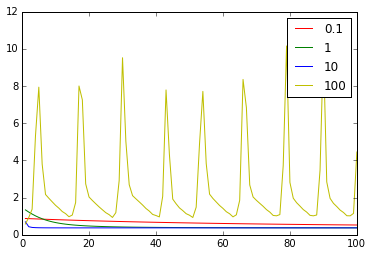

In [5]:
X, Y = generate_data(50) 
N = np.arange(1,101)


W, costs1 = train_logistic_regression(X, Y, 0.1, 100)
W, costs2 = train_logistic_regression(X, Y, 1, 100)
W, costs3 = train_logistic_regression(X, Y, 10, 100)
W, costs4 = train_logistic_regression(X, Y, 100, 100)
plt.plot(N, costs1, label = '0.1', color = 'r')
plt.plot(N, costs2, label = '1', color = 'g')
plt.plot(N, costs3, label = '10', color = 'b')
plt.plot(N, costs4, label = '100', color = 'y')
plt.legend()
plt.show()


Tốc độ học Learning rate ảnh hưởng lớn đến quá trình hội tụ của Gradient Descent.
Để quá trình hội tụ nhanh, giá trị của hệ số học không được quá lớn, cũng không được quá nhỏ.
Nếu giá trị Learning rate quá lớn thì "Bước nhảy" hội tụ sẽ lớn, nhảy qua cả điểm cực tiểu khiến quá trình hội tụ lâu, độ chính xác thấp (nhưng đôi khi nhảy đến gần điểm cực tiểu thì sẽ chính xác hơn, điều này sẽ lặp lại theo chu kì). Ngược lại Learning rate quá nhỏ thì "Bước nhảy" quá nhỏ, dẫn đến quá trình hội tụ chậm, nhưng sẽ quá trình hội tụ sẽ đến sát điểm cực tiểu hơn, độ chính xác cao.

## 7. Thí nghiệm 2: ảnh hưởng của kích thước tập huấn luyện

Đầu tiên, bạn sẽ viết hàm `experiment_N`; hàm này có hai tham số đầu vào:

- `Ns` (list): gồm các kích thước của tập huấn luyện mà mình sẽ thí nghiệm.
- `num_runs` (int): số lần chạy với mỗi kích thước của tập huấn luyện.

Trong hàm `experiment_N`, với mỗi kích thước `N` của tập huấn luyện, ta sẽ chạy `num_runs` lần, trong đó ở mỗi lần chạy:

- Phát sinh ra tập huấn luyện gồm `N` điểm dữ liệu.
- Huấn luyện Logistic Regression để tìm ra bộ tham số `W`.
- Tính độ lỗi trên tập huấn luyện `E_in`.
- Phát sinh ra tập kiểm tra (test set) gồm 1000 điểm dữ liệu.
- Tính độ lỗi trên tập kiểm tra `E_out`.

Ta sẽ tính giá trị trung bình của `E_in` và `E_out` sau `num_runs` lần chạy.

Trong hàm `experiment_N`, bạn sẽ bổ sung các phần sau:

- Nếu `len(Ns) = 1` và `num_runs = 1` thì bạn sẽ vẽ ra đồ thị có trục hoành là $x_1$ và trục tung là $x_2$; trên đồ thị này, bạn sẽ vẽ ra đường thẳng $x_1 - x_2 = 0$ ứng với đường phân lớp đích, các điểm dữ liệu của tập huấn luyện, và đường phân lớp học được của Logistic Regression.
- Nếu `len(Ns) > 1` thì bạn sẽ vẽ ra đồ thị có trục hoành là kích thước `N` của tập huấn luyện và trục tung là độ lỗi; trên đồ thị này, bạn sẽ vẽ ra hai đường ứng với `E_in` và `E_out` (các giá trị trung bình sau `num_runs` lần chạy) để cho thấy sự thay đổi của `E_in` và `E_out` khi `N` thay đổi.

In [6]:
def experiment_N(Ns, num_runs):
    """
    Parameters
    ----------
    Ns : list
        List of training set's sizes.
    num_runs: int
        The number of runs.
    """
    
    avg_E_in_list = [] # The list of average E_in's (each average E_in corresponds to a training set's size)
    avg_E_out_list = [] # The list of average E_out's
    
    for N in Ns:
        avg_E_in = 0.0
        avg_E_out = 0.0
        for r in range(num_runs):
            # Generate a training set
            X, Y = generate_data(N)
            
            # Train Logistic Regression, learning_rate = 10, max_epoch = 100
            W, _ = train_logistic_regression(X, Y, 10, 100)
            Col =  Y.reshape((N, ))
            # Compute E_in and update average E_in
            E_in = compute_err(W, X, Y)
            avg_E_in += E_in / num_runs
            
            # Visualize the target line, the training data points, and the line of Logistic Regression
            # TODO: if len(Ns) == 1 and num_runs == 1:
            if (len(Ns) == 1 and num_runs == 1):
                plt.plot([-1, 1], [-1, 1], label = 'x1 - x2 = 0')
                plt.plot(X.T[1][Col < 0], X.T[2][Col < 0], 'ro')
                plt.plot(X.T[1][Col > 0], X.T[2][Col > 0], 'bo')
                plt.plot([-1, 1], [(-W[0] + W[1]) / W[2], (-W[0] - W[1]) / W[2]], label = 'Logistic Regesstion')
                plt.legend()
                plt.show()       
            # Generate a test set
            X_test, Y_test = generate_data(1000)
            
            # Compute E_out and update average E_out
            E_out = compute_err(W, X_test, Y_test)
            avg_E_out += E_out / num_runs
            
        avg_E_in_list.append(avg_E_in)
        avg_E_out_list.append(avg_E_out)
    
    # Visualize how avg_E_in and avg_E_out vary when N varies    
    # TODO: if len(Ns) > 1:
    if len(Ns) > 1:
        plt.plot(Ns, avg_E_in_list, label = 'E_in')
        plt.plot(Ns, avg_E_out_list, label = 'E_out', color = 'g')
        plt.legend()
        plt.show()

Để kiểm tra một cách trực quan đường phân lớp học được của Logistic Regression, bạn hãy gọi hàm `experiment_N` ở trên với `Ns = [50]` và `num_runs = 1`.

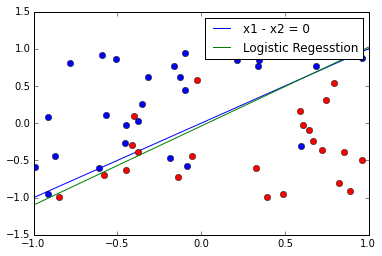

In [7]:
# TODO
Ns = [50]
num_runs = 1
experiment_N(Ns, num_runs)

Kế đến, để thấy được sự thay đổi của `E_in` và `E_out` khi `N` thay đổi, bạn hãy gọi hàm `experiment_N` ở trên với `Ns = [10, 20, 30, 40, 50]` và `num_runs = 100`. 

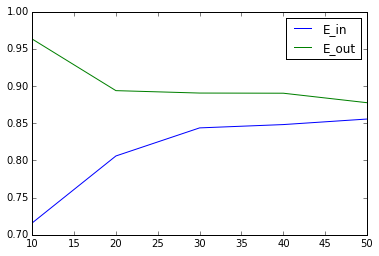

In [8]:
# TODO
Ns = [10, 20, 30, 40, 50]
num_runs = 100
experiment_N(Ns, num_runs)

Số lượng phần tử tập huấn luyện càng nhiều thì độ lỗi E_out càng thấp, chứng tỏ, khi ta train càng nhiều phần tử, thì quá trình học sẽ chính xác hơn nhiều.
E_in cũng như vậy, ban đầu khi train càng ít phần tử thì độ lỗi càng thấp, train càng nhiều thì độ lỗi càng cao, nhưng tới một mức độ phần tử đủ nhiều, quá trình học đủ tốt, nắm bắt được đủ trường hợp hơn thì càng về sau, độ lỗi sẽ dần ổn định và giảm dần.